In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import svd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from scipy.cluster.vq import kmeans2

In [37]:
df = pd.read_csv(r'C:\Users\DELL\Desktop\nbadataset.csv')  
df.head(7)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,58,58,1564,6.0,10.2,...,0.590,4.5,8.0,12.5,3.2,1.2,1.5,2.0,2.6,14.6
1,2,Bam Adebayo,PF,22,MIA,65,65,2235,6.6,11.6,...,0.690,2.7,8.3,11.0,5.4,1.3,1.4,3.0,2.6,17.0
2,3,LaMarcus Aldridge,C,34,SAS,53,53,1754,8.0,16.3,...,0.827,2.1,5.9,8.0,2.6,0.7,1.8,1.5,2.6,20.5
3,4,Nickeil Alexander-Walker,SG,21,NOP,41,0,501,5.5,16.3,...,0.607,0.6,5.2,5.7,5.3,0.8,0.5,2.9,3.3,15.2
4,5,Grayson Allen,SG,24,MEM,30,0,498,5.7,12.7,...,0.857,0.4,4.4,4.8,3.1,0.4,0.1,1.7,2.6,16.0
5,6,Jarrett Allen,C,21,BRK,64,58,1647,5.8,9.0,...,0.620,4.3,9.0,13.2,1.9,0.8,1.9,1.6,3.1,14.9
6,7,Kadeem Allen,SG,27,NYK,10,0,117,5.8,13.5,...,0.636,0.6,2.2,2.8,6.5,1.5,0.6,2.5,2.2,15.4


In [38]:
print(df.info())
print("----------------")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      624 non-null    int64  
 1   Player  624 non-null    object 
 2   Pos     624 non-null    object 
 3   Age     624 non-null    int64  
 4   Tm      624 non-null    object 
 5   G       624 non-null    int64  
 6   GS      624 non-null    int64  
 7   MP      624 non-null    int64  
 8   FG      624 non-null    float64
 9   FGA     624 non-null    float64
 10  FG%     619 non-null    float64
 11  3P      624 non-null    float64
 12  3PA     624 non-null    float64
 13  3P%     589 non-null    float64
 14  2P      624 non-null    float64
 15  2PA     624 non-null    float64
 16  2P%     612 non-null    float64
 17  FT      624 non-null    float64
 18  FTA     624 non-null    float64
 19  FT%     584 non-null    float64
 20  ORB     624 non-null    float64
 21  DRB     624 non-null    float64
 22  TR

In [39]:
df.shape

(624, 29)

In [40]:
print(df.isna().sum())

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        5
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%       12
FT         0
FTA        0
FT%       40
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64


In [41]:
df["FT%"] = pd.to_numeric(df["FT%"], downcast="float")
df["FG%"] = pd.to_numeric(df["FG%"], downcast="float")
m=df["FT%"].mean()
m1=df["FG%"].mean()
df["FT%"].fillna(m, inplace = True)
df["FG%"].fillna(m1, inplace = True)
print(df.isna().sum())

Rk         0
Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%       35
2P         0
2PA        0
2P%       12
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
dtype: int64


In [42]:
df["3P%"].fillna("0", inplace = True)
df["2P%"].fillna("0", inplace = True)
print(df.isna().sum())

Rk        0
Player    0
Pos       0
Age       0
Tm        0
G         0
GS        0
MP        0
FG        0
FGA       0
FG%       0
3P        0
3PA       0
3P%       0
2P        0
2PA       0
2P%       0
FT        0
FTA       0
FT%       0
ORB       0
DRB       0
TRB       0
AST       0
STL       0
BLK       0
TOV       0
PF        0
PTS       0
dtype: int64


In [43]:
max_team = df.groupby(by = ['Player','Tm'], as_index=False)['G'].max()
nba = max_team.merge(df, how = 'left')
len(nba)

624

In [44]:
nba

,Player,Tm,G,Rk,Pos,Age,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Aaron Gordon,ORL,58,173,PF,24,58,1914,5.9,13.7,...,0.675000,1.9,6.4,8.3,4.0,0.9,0.7,1.8,2.2,15.7
1,Aaron Holiday,IND,58,216,PG,23,26,1368,5.3,13.1,...,0.861000,0.6,2.9,3.5,5.1,1.2,0.3,2.0,2.7,14.4
2,Abdel Nader,OKC,48,355,SF,26,5,756,4.8,10.5,...,0.774000,0.7,3.6,4.3,1.7,1.0,1.0,1.7,3.1,13.7
3,Adam Mokoka,CHI,11,338,SG,21,0,112,3.9,9.0,...,0.500000,2.3,1.0,3.2,1.3,1.3,0.0,0.6,5.5,10.3
4,Admiral Schofield,WAS,27,429,SF,22,2,293,3.7,9.2,...,0.692000,0.7,3.4,4.2,1.7,1.0,0.4,0.9,5.0,10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Zach Norvell,LAL,2,362,SG,22,0,5,0.0,7.2,...,0.743014,0.0,7.2,7.2,0.0,0.0,0.0,0.0,0.0,0.0
620,Zach Norvell,TOT,5,362,SG,22,0,41,2.6,10.5,...,1.000000,0.0,5.3,5.3,2.6,1.8,0.0,2.6,3.5,8.8
621,Zhaire Smith,PHI,7,445,SG,20,0,32,3.4,12.4,...,0.500000,0.0,2.3,2.3,2.3,3.4,0.0,2.3,4.5,9.0
622,Zion Williamson,NOP,19,504,PF,19,19,565,11.0,18.6,...,0.645000,3.5,4.7,8.2,2.6,1.0,0.6,3.2,2.0,28.5


In [46]:
df2 = pd.read_csv(r'C:\Users\DELL\Desktop\advanced.csv') 
df2.head(7)

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Álex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,NaN,0.1,0.6,0.6,0.053,NaN,-3.7,0.4,-3.3,-0.2
1,2,Quincy Acy,PF,28,PHO,10,123,2.9,0.379,0.833,...,NaN,-0.1,0.0,-0.1,-0.022,NaN,-7.6,-0.5,-8.1,-0.2
2,3,Jaylen Adams,PG,22,ATL,34,428,7.6,0.474,0.673,...,NaN,-0.1,0.2,0.1,0.011,NaN,-3.8,-0.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,80,2669,18.5,0.591,0.002,...,NaN,5.1,4.0,9.1,0.163,NaN,0.7,0.4,1.1,2.1
4,5,Bam Adebayo,C,21,MIA,82,1913,17.9,0.623,0.031,...,NaN,3.4,3.4,6.8,0.171,NaN,-0.4,2.2,1.8,1.8
5,6,Deng Adel,SF,21,CLE,19,194,2.7,0.424,0.639,...,NaN,-0.2,0.0,-0.2,-0.054,NaN,-6.0,-1.6,-7.5,-0.3
6,7,DeVaughn Akoon-Purcell,SG,25,DEN,7,22,8.2,0.322,0.400,...,NaN,-0.1,0.0,0.0,-0.051,NaN,-7.9,2.1,-5.8,0.0


In [47]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708 entries, 0 to 707
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rk           708 non-null    int64  
 1   Player       708 non-null    object 
 2   Pos          708 non-null    object 
 3   Age          708 non-null    int64  
 4   Tm           708 non-null    object 
 5   G            708 non-null    int64  
 6   MP           708 non-null    int64  
 7   PER          708 non-null    float64
 8   TS%          702 non-null    float64
 9   3PAr         702 non-null    float64
 10  FTr          702 non-null    float64
 11  ORB%         708 non-null    float64
 12  DRB%         708 non-null    float64
 13  TRB%         708 non-null    float64
 14  AST%         708 non-null    float64
 15  STL%         708 non-null    float64
 16  BLK%         708 non-null    float64
 17  TOV%         702 non-null    float64
 18  USG%         708 non-null    float64
 19  Unnamed:

In [48]:
print(df2.isna().sum())

Rk               0
Player           0
Pos              0
Age              0
Tm               0
G                0
MP               0
PER              0
TS%              6
3PAr             6
FTr              6
ORB%             0
DRB%             0
TRB%             0
AST%             0
STL%             0
BLK%             0
TOV%             6
USG%             0
Unnamed: 19    708
OWS              0
DWS              0
WS               0
WS/48            0
Unnamed: 24    708
OBPM             0
DBPM             0
BPM              0
VORP             0
dtype: int64


In [49]:
print(df2['MP'].describe())


nba2 = df2[df2['MP'] >= 250]
print()
print("Total Players that played at least 250 minutes:",len(nba2))

count     708.000000
mean      972.257062
std       802.770673
min         1.000000
25%       245.250000
50%       788.000000
75%      1579.500000
max      3028.000000
Name: MP, dtype: float64

Total Players that played at least 250 minutes: 530


In [50]:
nba2

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,Unnamed: 19,OWS,DWS,WS,WS/48,Unnamed: 24,OBPM,DBPM,BPM,VORP
0,1,Álex Abrines,SG,25,OKC,31,588,6.3,0.507,0.809,...,NaN,0.1,0.6,0.6,0.053,NaN,-3.7,0.4,-3.3,-0.2
2,3,Jaylen Adams,PG,22,ATL,34,428,7.6,0.474,0.673,...,NaN,-0.1,0.2,0.1,0.011,NaN,-3.8,-0.5,-4.3,-0.2
3,4,Steven Adams,C,25,OKC,80,2669,18.5,0.591,0.002,...,NaN,5.1,4.0,9.1,0.163,NaN,0.7,0.4,1.1,2.1
4,5,Bam Adebayo,C,21,MIA,82,1913,17.9,0.623,0.031,...,NaN,3.4,3.4,6.8,0.171,NaN,-0.4,2.2,1.8,1.8
7,8,LaMarcus Aldridge,C,33,SAS,81,2687,22.9,0.576,0.032,...,NaN,6.4,2.9,9.3,0.167,NaN,2.4,-0.6,1.8,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,527,Cody Zeller,C,26,CHO,49,1243,17.2,0.611,0.064,...,NaN,2.6,1.2,3.9,0.150,NaN,-0.6,0.7,0.1,0.7
704,529,Ante Žižić,C,22,CLE,59,1082,16.2,0.590,0.000,...,NaN,1.7,0.3,2.0,0.087,NaN,-1.1,-2.1,-3.2,-0.3
705,530,Ivica Zubac,C,21,TOT,59,1040,18.9,0.604,0.000,...,NaN,1.9,1.3,3.2,0.148,NaN,-0.2,-0.2,-0.5,0.4
706,530,Ivica Zubac,C,21,LAL,33,516,19.5,0.633,0.000,...,NaN,1.1,0.6,1.8,0.165,NaN,-0.3,0.1,-0.2,0.2


In [52]:
df1 = nba2[['Player','PER','TS%','USG%','WS',]]
df3 = nba[['Player','TRB','AST','BLK','STL','G','FT%','3P%','2P%','FT%']]

newnba = df1.merge(df2, how = 'left')
print("Length should be 359 players:",len(df3))
df3.head()

Length should be 359 players: 624


,Player,TRB,AST,BLK,STL,G,FT%,3P%,2P%,FT%
0,Aaron Gordon,8.3,4.0,0.7,0.9,58,0.675,0.301,0.492,0.675
1,Aaron Holiday,3.5,5.1,0.3,1.2,58,0.861,0.394,0.416,0.861
2,Abdel Nader,4.3,1.7,1.0,1.0,48,0.774,0.371,0.53,0.774
3,Adam Mokoka,3.2,1.3,0.0,1.3,11,0.500,0.4,0.462,0.500
4,Admiral Schofield,4.2,1.7,0.4,1.0,27,0.692,0.298,0.571,0.692


In [53]:
df4 = df3.drop(labels = 'Player',axis =1)
df4 = df4.fillna(0)

In [55]:
df4

,TRB,AST,BLK,STL,G,FT%,3P%,2P%,FT%
0,8.3,4.0,0.7,0.9,58,0.675000,0.301,0.492,0.675000
1,3.5,5.1,0.3,1.2,58,0.861000,0.394,0.416,0.861000
2,4.3,1.7,1.0,1.0,48,0.774000,0.371,0.53,0.774000
3,3.2,1.3,0.0,1.3,11,0.500000,0.4,0.462,0.500000
4,4.2,1.7,0.4,1.0,27,0.692000,0.298,0.571,0.692000
...,...,...,...,...,...,...,...,...,...
619,7.2,0.0,0.0,0.0,2,0.743014,0,0,0.743014
620,5.3,2.6,0.0,1.8,5,1.000000,0.375,0,1.000000
621,2.3,2.3,0.0,3.4,7,0.500000,0,0.375,0.500000
622,8.2,2.6,0.6,1.0,19,0.645000,0.462,0.595,0.645000


In [58]:
standardized_data = StandardScaler().fit_transform(df4)
pca = PCA(n_components=2)
fit = pca.fit_transform(standardized_data)


In [62]:
pca_var = pd.DataFrame(fit, columns = ['PC1','PC2'])

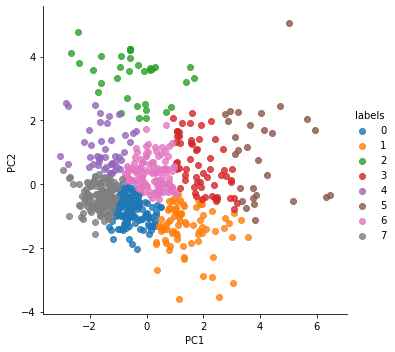

In [64]:
%matplotlib inline

plt.rc("savefig", dpi=100) 

centroids = kmeans2(pca_var, k = 8)[0]
labels = kmeans2(pca_var, k = 8)[1]

        
pca_var['labels'] = labels
sns.lmplot(x = 'PC1', y = 'PC2', data = pca_var,hue ='labels', fit_reg= False)

In [65]:
player_label = pca_var.copy()
player_label['Player'] = df3['Player']
player_label.head(20)

,PC1,PC2,labels,Player
0,0.365174,-0.638746,0,Aaron Gordon
1,-2.019343,-0.344577,7,Aaron Holiday
2,-0.375855,-0.601326,0,Abdel Nader
3,1.090591,1.505635,3,Adam Mokoka
4,0.198173,0.347495,6,Admiral Schofield
5,-0.162974,-1.100066,0,Al Horford
6,0.881658,1.297847,6,Al-Farouq Aminu
7,-1.727332,-0.337119,7,Alec Burks
8,-1.452603,0.842423,4,Alec Burks
9,-1.759645,-0.623900,7,Alec Burks


In [67]:
cluster1 = player_label.merge(nba2, on = 'Player',how = 'left')
final = cluster1.merge(nba,on = 'Player', how = 'left')
final.head(5)

,PC1,PC2,labels,Player,Rk_x,Pos_x,Age_x,Tm_x,G_x,MP_x,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0.365174,-0.638746,0,Aaron Gordon,189.0,PF,23.0,ORL,78.0,2633.0,...,0.675,1.9,6.4,8.3,4.0,0.9,0.7,1.8,2.2,15.7
1,-2.019343,-0.344577,7,Aaron Holiday,229.0,PG,22.0,IND,50.0,646.0,...,0.861,0.6,2.9,3.5,5.1,1.2,0.3,2.0,2.7,14.4
2,-0.375855,-0.601326,0,Abdel Nader,371.0,SF,25.0,OKC,61.0,694.0,...,0.774,0.7,3.6,4.3,1.7,1.0,1.0,1.7,3.1,13.7
3,1.090591,1.505635,3,Adam Mokoka,NaN,NaN,NaN,NaN,NaN,NaN,...,0.500,2.3,1.0,3.2,1.3,1.3,0.0,0.6,5.5,10.3
4,0.198173,0.347495,6,Admiral Schofield,NaN,NaN,NaN,NaN,NaN,NaN,...,0.692,0.7,3.4,4.2,1.7,1.0,0.4,0.9,5.0,10.2


In [70]:
final.to_csv(r'C:\Users\DELL\Desktop\nbadataset1.csv')